
# Project: Investigate a Dataset - TMDb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The following database was extracted from kaggle and contains data of movies and it's ratings and revenue. The database has also data of director, cast, budget, genres, production company, relase year and more. 


### Questions for Analysis

In order to answers the following questions, the previus database will be processed to result in a dataset to help in the analysis. 

>Which genres are most popular from year to year?

>What kinds of properties are associated with movies that have high revenues?  

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

In [2]:
!pip install --upgrade pandas==0.25.0;
!pip install seaborn==0.10.1

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

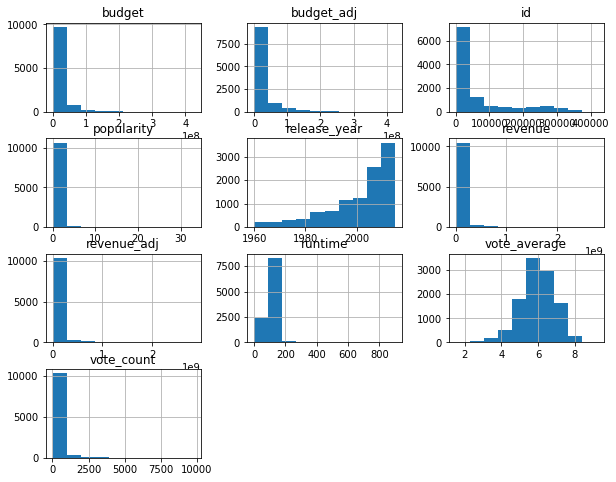

In [7]:
df.hist(figsize = (10,8));

### Data Cleaning

First. let's drop out the columns that we are not going to be using for this analysis. Using drop function we can select the columns that we want to drop out and the result goes like this:

In [8]:
df.drop(['id','imdb_id','homepage','tagline','overview', 'production_companies', 'keywords'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
cast              10790 non-null object
director          10822 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


As we can see, we still have missing date in some columns that werent droped out. Lets take a look on this data and compare with the total data frame

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

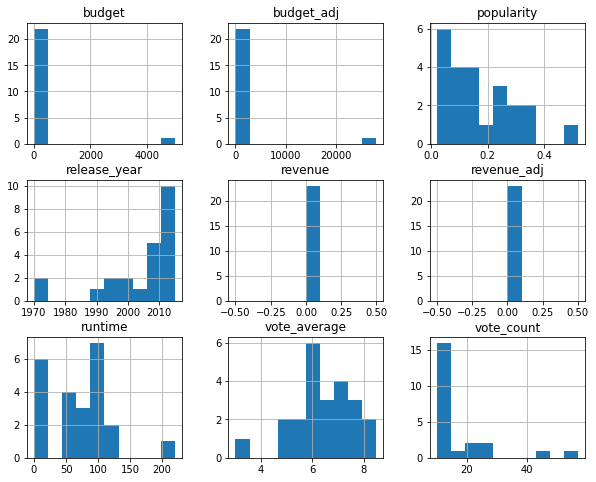

In [9]:
df[df.genres.isnull()].hist(figsize=(10,8));

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

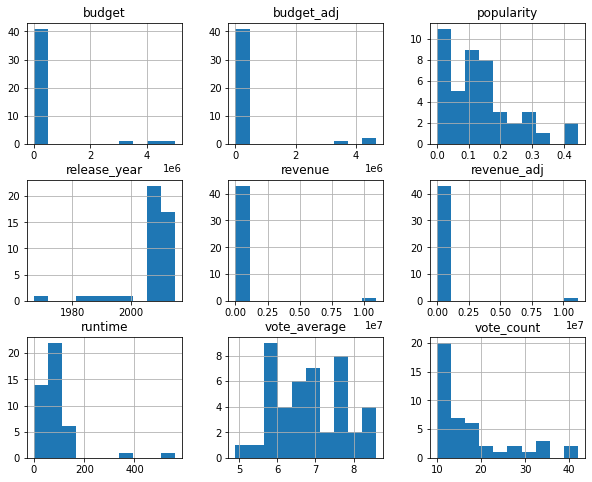

In [10]:
df[df.director.isnull()].hist(figsize=(10,8));

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

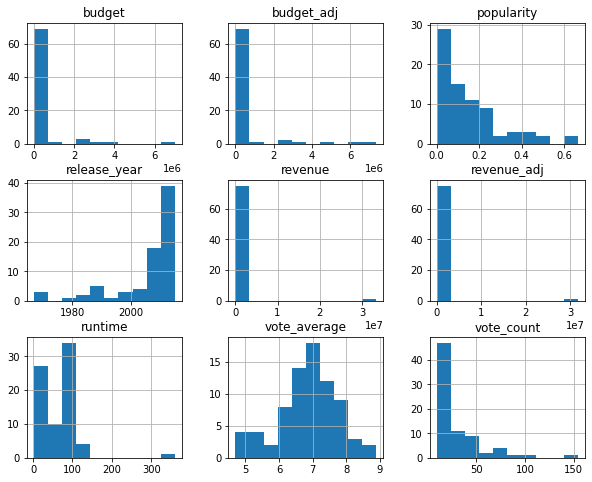

In [11]:
df[df.cast.isnull()].hist(figsize=(10,8));

By the histograms we can note similary caracteristic such as budget, runtime, popularity. and if we compare to the total data frame we can see that this missing data does not make a big impact on the data so we can just drop them out as well. 

In [12]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10732 entries, 0 to 10865
Data columns (total 14 columns):
popularity        10732 non-null float64
budget            10732 non-null int64
revenue           10732 non-null int64
original_title    10732 non-null object
cast              10732 non-null object
director          10732 non-null object
runtime           10732 non-null int64
genres            10732 non-null object
release_date      10732 non-null object
vote_count        10732 non-null int64
vote_average      10732 non-null float64
release_year      10732 non-null int64
budget_adj        10732 non-null float64
revenue_adj       10732 non-null float64
dtypes: float64(4), int64(5), object(5)
memory usage: 1.2+ MB


So that we can look to each genre alone it is necessary to slip the column 'genres' and explode the result in rows.

In [13]:
df_genres = df.assign(genres=df.genres.str.split("|")).explode('genres')
df_genres.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


See that the rows seems to be duplicated but they are not, as we can see, the genres column is different for each row duplicated.

The same process will be done for cast and director column, and those changes are going to be saved on respective data frames as it was done with the genre's data frame above.

In [14]:
df_cast = df.assign(cast=df.cast.str.split("|")).explode('cast')
df_cast.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09


In [15]:
df_director = df.assign(director=df.director.str.split("|")).explode('director')
df_director.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis

### Which genres are most popular from year to year?

To start, it is important to take a look on the genre data frame and your's columns with discribe function. On this step we will be able to see the min. popularity value, the max., the mean and also the std. 

In [16]:
df_genres.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,26758.000000,2.675800e+04,2.675800e+04,26758.000000,26758.000000,26758.000000,26758.000000,2.675800e+04,2.675800e+04
mean,0.710223,1.763896e+07,4.779010e+07,103.046827,251.664960,5.950071,2000.658831,2.119617e+07,6.133530e+07
std,1.117990,3.470444e+07,1.326337e+08,29.558478,640.066684,0.909437,12.770519,3.829881e+07,1.620401e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.226614,0.000000e+00,0.000000e+00,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.414316,2.500000e+04,0.000000e+00,100.000000,44.000000,6.000000,2005.000000,3.784891e+04,0.000000e+00
75%,0.779581,2.000000e+07,3.132790e+07,112.000000,176.000000,6.600000,2011.000000,2.734338e+07,4.441365e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Let's now take a look on the data frame by filtering and grouping by the release year and genres column

In [17]:
df_genres.groupby(['release_year','genres']).popularity.max()

release_year  genres         
1960          Action              1.872132
              Adventure           1.872132
              Comedy              0.947307
              Crime               0.423531
              Drama               2.610362
                                   ...    
2015          Science Fiction    32.985763
              TV Movie            0.516954
              Thriller           32.985763
              War                 5.476958
              Western             9.110700
Name: popularity, Length: 1045, dtype: float64

Now, we can see, in each each, the genres and the respective popularity max values. But to see only the most popular genre we need to group by again but this time only the largest popularity value in a release year level

In [18]:
df_genres.groupby(['release_year','genres']).popularity.max().groupby(level='release_year').nlargest(1)

release_year  release_year  genres   
1960          1960          Drama         2.610362
1961          1961          Adventure     2.631987
1962          1962          Action        3.170651
1963          1963          Action        2.508235
1964          1964          Action        3.153791
1965          1965          Action        1.910465
1966          1966          Animation     1.227582
1967          1967          Adventure     2.550704
1968          1968          Adventure     3.309196
1969          1969          Action        1.778746
1970          1970          Adventure     1.936962
1971          1971          Drama         3.072555
1972          1972          Crime         5.738034
1973          1973          Animation     2.272486
1974          1974          Crime         3.264571
1975          1975          Drama         3.258151
1976          1976          Crime         2.582657
1977          1977          Action       12.037933
1978          1978          Music         1.

Doing that, the release_year column were duplicated, to solve that we reset the index.

In [19]:
df_genres.groupby(['release_year','genres']).popularity.max().groupby(level='release_year').nlargest(1).reset_index(level=0,drop=True)

release_year  genres   
1960          Drama         2.610362
1961          Adventure     2.631987
1962          Action        3.170651
1963          Action        2.508235
1964          Action        3.153791
1965          Action        1.910465
1966          Animation     1.227582
1967          Adventure     2.550704
1968          Adventure     3.309196
1969          Action        1.778746
1970          Adventure     1.936962
1971          Drama         3.072555
1972          Crime         5.738034
1973          Animation     2.272486
1974          Crime         3.264571
1975          Drama         3.258151
1976          Crime         2.582657
1977          Action       12.037933
1978          Music         1.697618
1979          Action        4.935897
1980          Action        5.488441
1981          Action        4.578300
1982          Drama         4.215642
1983          Action        4.828854
1984          Action        4.831966
1985          Adventure     6.095293
1986          

Now it looks like what we were searching for. Let's plot a chart to visualize better the result. 

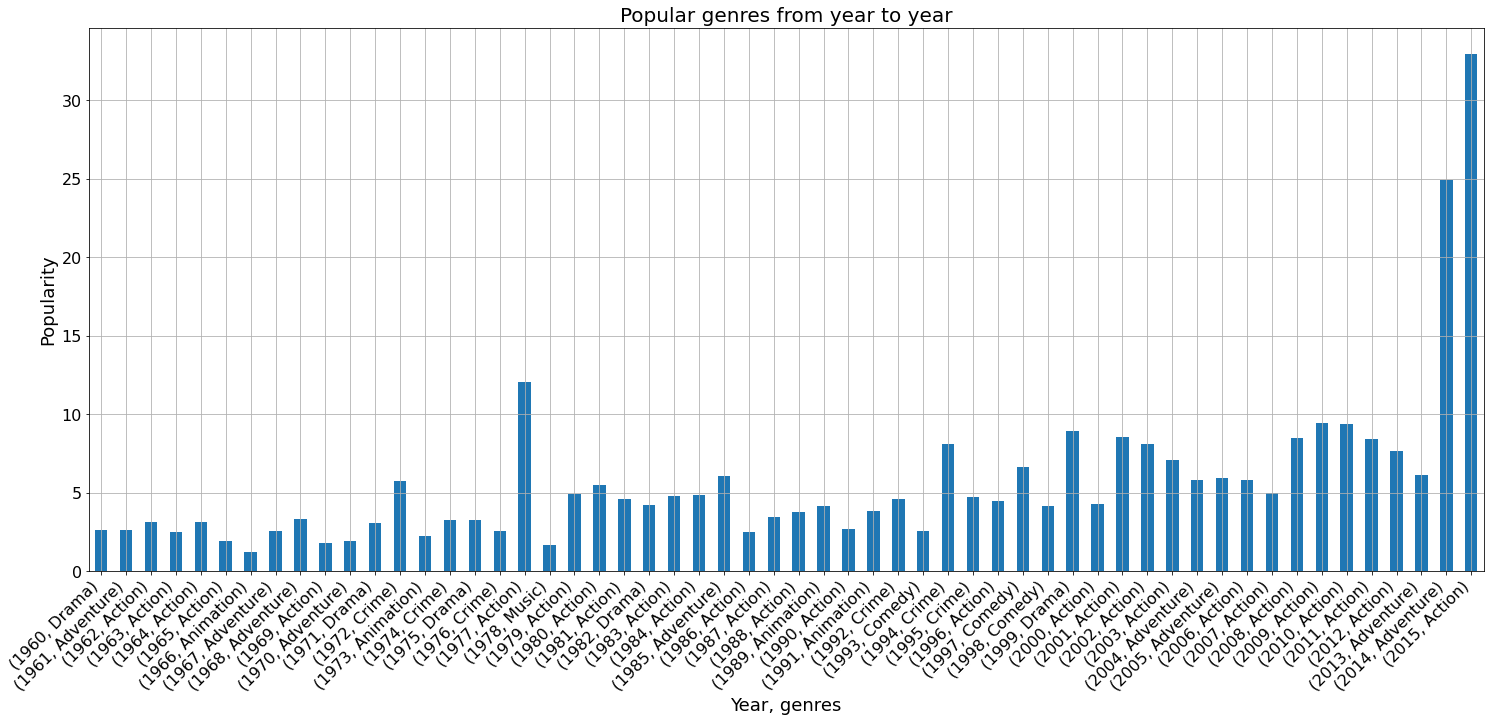

In [20]:
df_genres.groupby(['release_year','genres']).popularity.max().groupby(level='release_year').nlargest(1).reset_index(level=0,drop=True).plot(kind='bar', figsize=(25,10));
plt.title('Popular genres from year to year', fontdict={'fontsize':20})
plt.grid()
plt.xticks(rotation=45, ha='right',fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Year, genres', fontsize=18)
plt.ylabel('Popularity', fontsize=18);

### What kinds of properties are associated with movies that have high revenues?

Plotting the histogram of the data frame so we can look for a correlaction

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

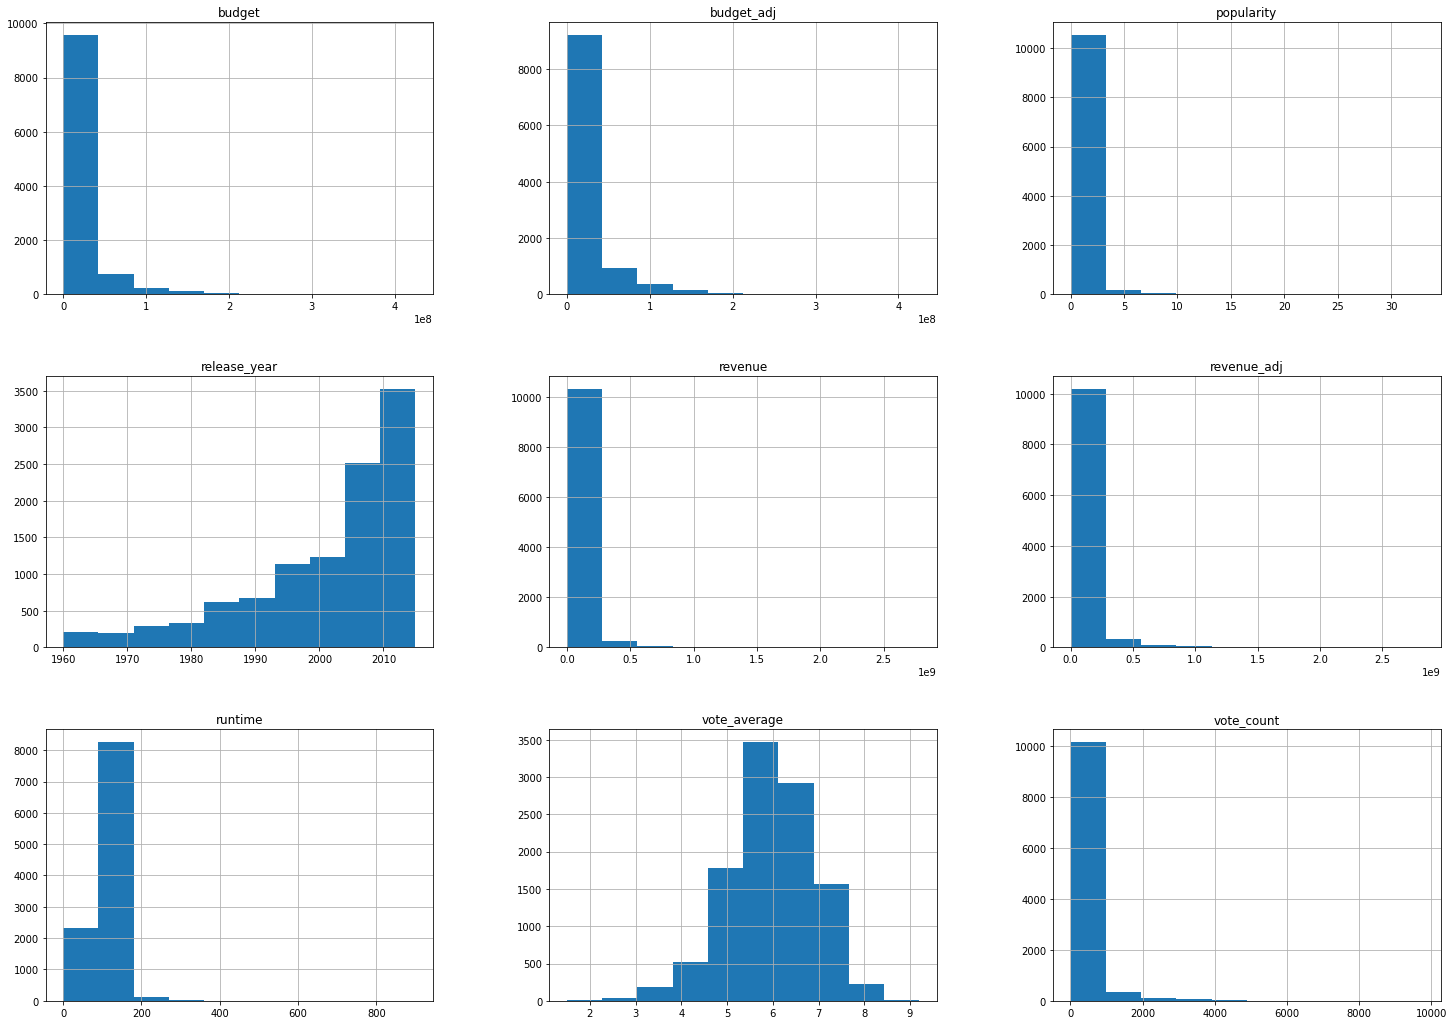

In [21]:
df.hist(figsize=(25,18));

As there was no correlaction, or at least there was no one easy to see using the histogram, let's try another way. 

Groupping by genres and listing the largest 25 most revenue values may be a way to see a relaction

In [22]:
df_genres.groupby('genres').revenue.max().nlargest(25)

genres
Action             2781505847
Fantasy            2781505847
Adventure          2781505847
Science Fiction    2781505847
Romance            1845034188
Drama              1845034188
Thriller           1845034188
Crime              1506249360
Family             1327817822
Animation          1274219009
Comedy             1156730962
Mystery            1106279658
War                 650523427
Horror              585349010
Western             532950503
History             481840909
Music               443140005
Documentary         119114517
Foreign              76000000
TV Movie             42000000
Name: revenue, dtype: int64

That's look like a list that can be used to see which genres are more revenue. 
So let's plot a chart to vizualise better the result

But before do that, let's create a function to help us turning the grid on, rotating the x ticks and also adjust the size of it as well as the y ticks. That's will help us to optimize our code.

In [23]:
def configplot():
    plt.grid()
    plt.xticks(rotation=30, ha='right',fontsize=16)
    plt.yticks(fontsize=16)

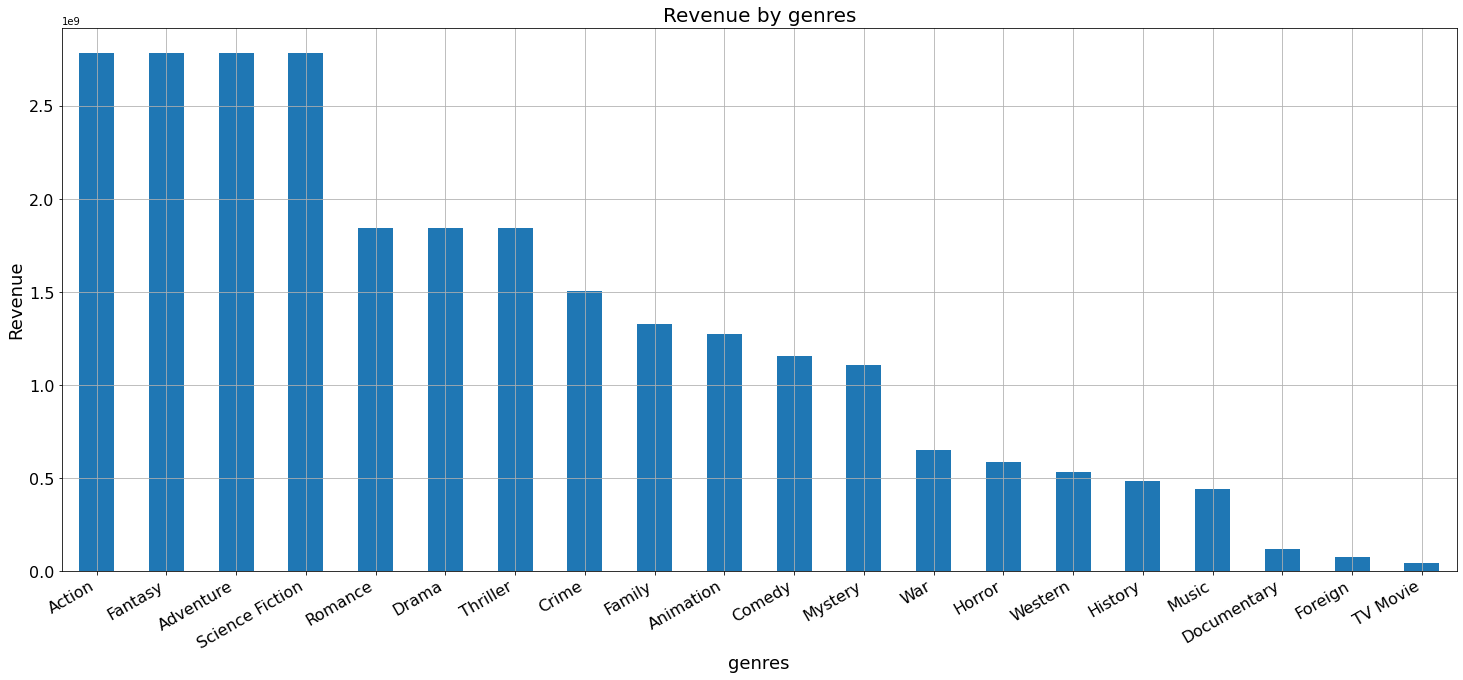

In [24]:
df_genres.groupby('genres').revenue.max().nlargest(25).plot(kind='bar', figsize=(25,10));
plt.title('Revenue by genres', fontdict={'fontsize':20})
configplot()
plt.xlabel('genres', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

A similar caracterist of genre is cast, let's do the same process with de cast data frame and see the result.

In [25]:
df_cast.groupby('cast').revenue.max().nlargest(25)

cast
Michelle Rodriguez     2781505847
Sam Worthington        2781505847
Sigourney Weaver       2781505847
Stephen Lang           2781505847
Zoe Saldana            2781505847
Adam Driver            2068178225
Carrie Fisher          2068178225
Daisy Ridley           2068178225
Harrison Ford          2068178225
Mark Hamill            2068178225
Billy Zane             1845034188
Frances Fisher         1845034188
Kate Winslet           1845034188
Kathy Bates            1845034188
Leonardo DiCaprio      1845034188
Chris Evans            1519557910
Chris Hemsworth        1519557910
Mark Ruffalo           1519557910
Robert Downey Jr.      1519557910
Scarlett Johansson     1519557910
Bryce Dallas Howard    1513528810
Chris Pratt            1513528810
Irrfan Khan            1513528810
Nick Robinson          1513528810
Vincent D'Onofrio      1513528810
Name: revenue, dtype: int64

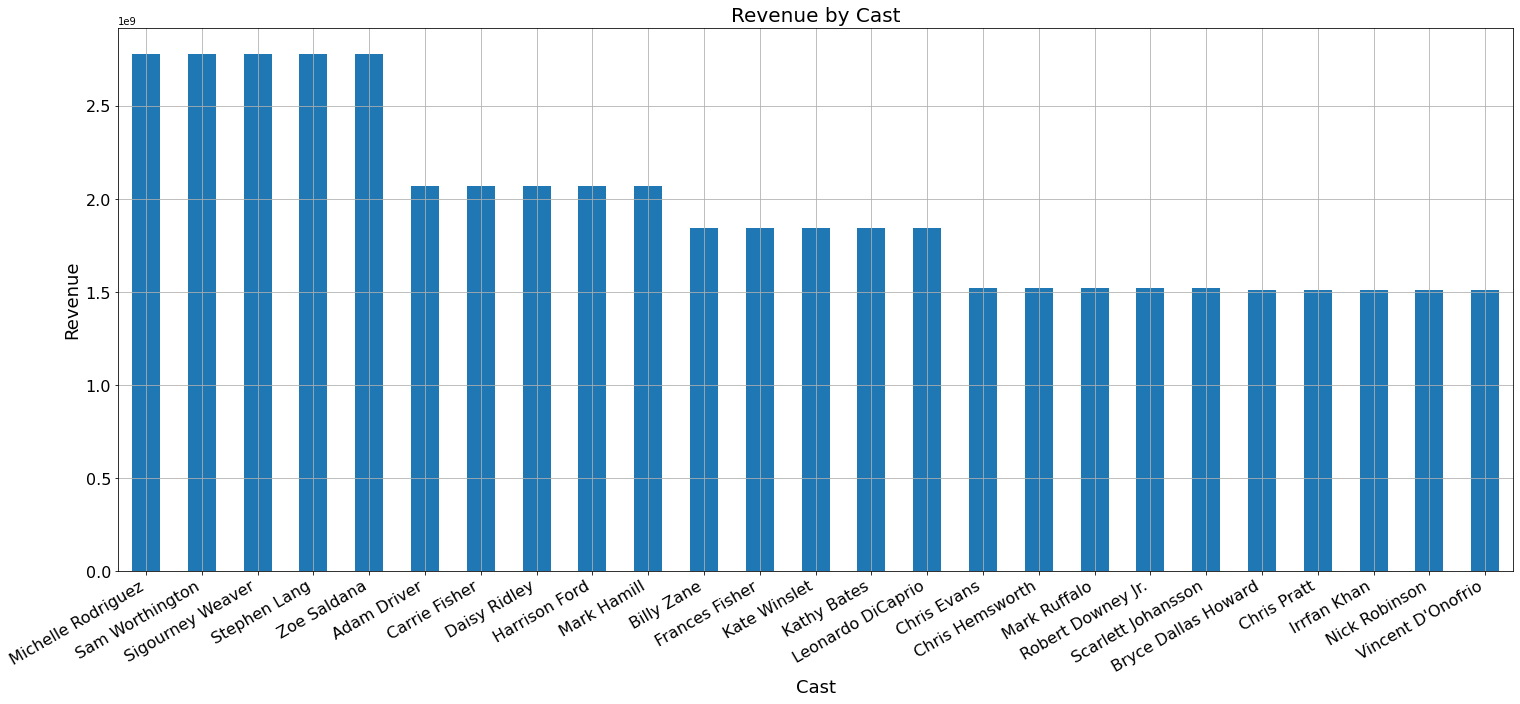

In [26]:
df_cast.groupby('cast').revenue.max().nlargest(25).plot(kind='bar', figsize=(25,10));
plt.title('Revenue by Cast', fontdict={'fontsize':20})
configplot()
plt.xlabel('Cast', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

Here we can see the relatioship between the cast and the most revenue movies. As the cast, the director can also be related to the revenue, let's see it on an chart as well.

In [27]:
df_director.groupby('director').revenue.max().nlargest(25)

director
James Cameron        2781505847
J.J. Abrams          2068178225
Joss Whedon          1519557910
Colin Trevorrow      1513528810
James Wan            1506249360
David Yates          1327817822
Chris Buck           1274219009
Jennifer Lee         1274219009
Shane Black          1215439994
Kyle Balda           1156730962
Pierre Coffin        1156730962
Michael Bay          1123746996
Peter Jackson        1118888979
Sam Mendes           1108561013
Irwin Winkler        1106279658
Christopher Nolan    1081041287
Gore Verbinski       1065659812
Lee Unkrich          1063171911
Tim Burton           1025467110
Rob Marshall         1021683000
Chris Columbus        976475550
Chris Renaud          970761885
George Lucas          924317558
Steven Spielberg      920100000
Andrew Adamson        919838758
Name: revenue, dtype: int64

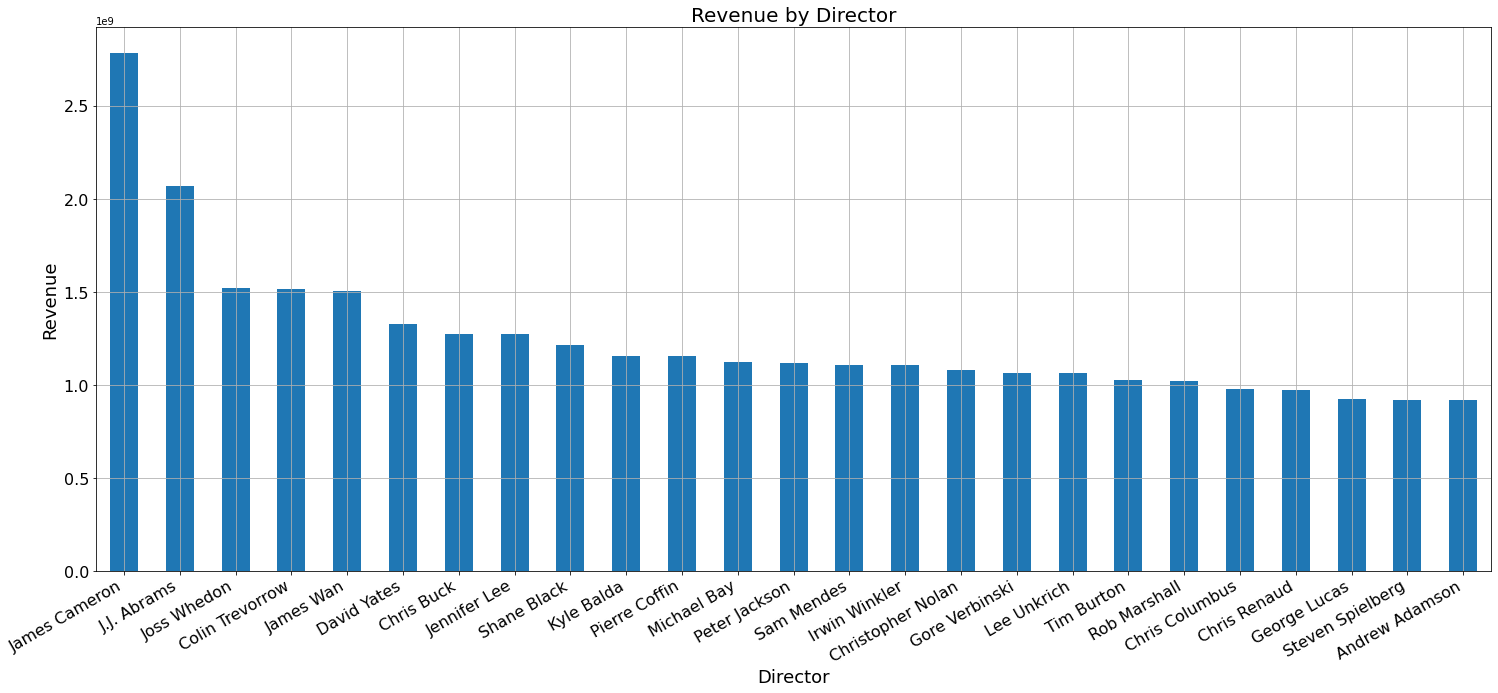

In [28]:
df_director.groupby('director').revenue.max().nlargest(25).plot(kind='bar', figsize=(25,10));
plt.title('Revenue by Director', fontdict={'fontsize':20})
configplot()
plt.xlabel('Director', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

The budget can also be related to the revenue. 

In [29]:
df.groupby('budget').revenue.max().nlargest(25)

budget
237000000    2781505847
200000000    2068178225
220000000    1519557910
150000000    1513528810
190000000    1506249360
280000000    1405035767
125000000    1327817822
74000000     1156730962
195000000    1123746996
94000000     1118888979
22000000     1106279658
250000000    1081041287
380000000    1021683000
185000000    1001921825
76000000      970761885
300000000     961000000
79000000      926287400
115000000     924317558
63000000      920100000
258000000     890871626
90000000      886686817
245000000     880674609
95000000      877244782
100000000     876688482
93000000      871368364
Name: revenue, dtype: int64

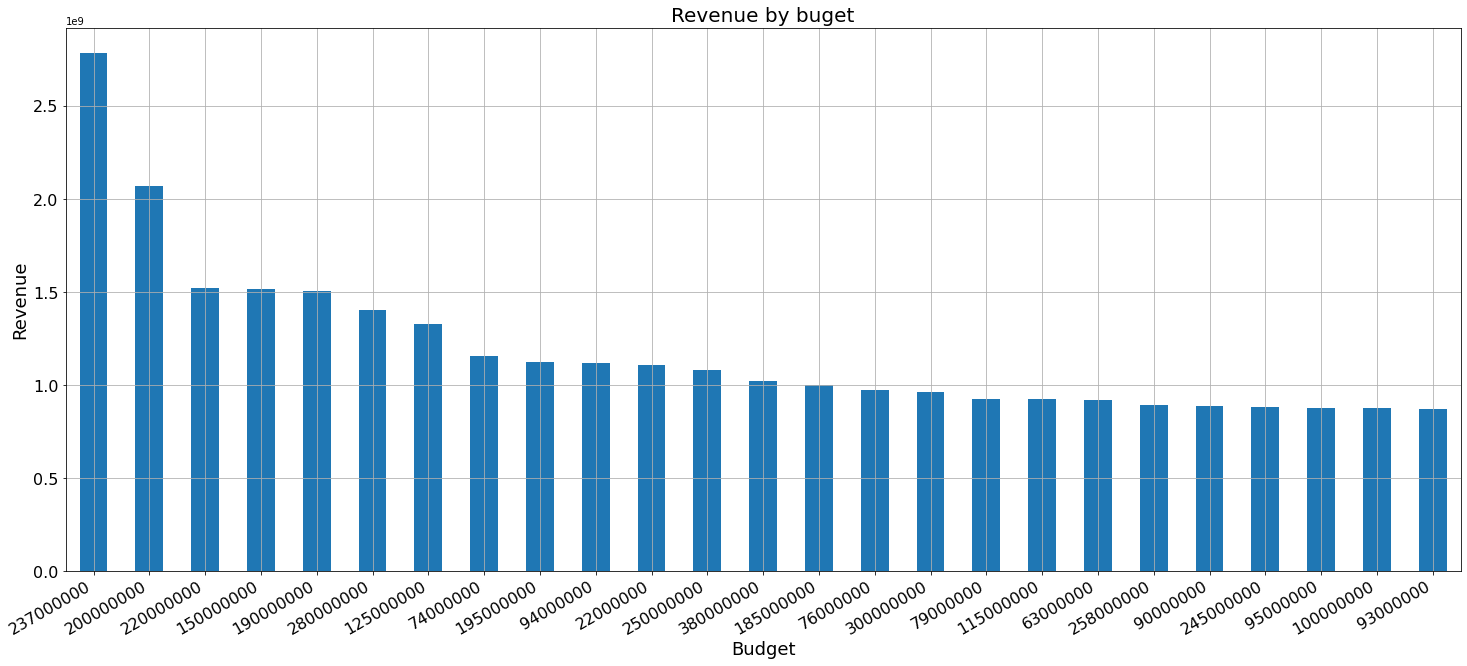

In [30]:
df.groupby('budget').revenue.max().nlargest(25).plot(kind='bar', figsize=(25,10));
plt.title('Revenue by buget', fontdict={'fontsize':20})
configplot()
plt.xlabel('Budget', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

As is, it's not that easy to se a relation between those two. 

Now that we saw some atributes, lets see the most revenue to see if we were right.

In [31]:
df.sort_values('revenue',ascending=False).head(10)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,12/10/09,8458,7.1,2009,2.408869e+08,2.827124e+09
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
5231,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194,Drama|Romance|Thriller,11/18/97,4654,7.3,1997,2.716921e+08,2.506406e+09
4361,7.637767,220000000,1519557910,The Avengers,Robert Downey Jr.|Chris Evans|Mark Ruffalo|Chr...,Joss Whedon,143,Science Fiction|Action|Adventure,4/25/12,8903,7.3,2012,2.089437e+08,1.443191e+09
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Robert Downey Jr.|Chris Hemsworth|Mark Ruffalo...,Joss Whedon,141,Action|Adventure|Science Fiction,4/22/15,4304,7.4,2015,2.575999e+08,1.292632e+09
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,Daniel Radcliffe|Rupert Grint|Emma Watson|Alan...,David Yates,130,Adventure|Family|Fantasy,7/7/11,3750,7.7,2011,1.211748e+08,1.287184e+09
5422,6.112766,150000000,1274219009,Frozen,Kristen Bell|Idina Menzel|Jonathan Groff|Josh ...,Chris Buck|Jennifer Lee,102,Animation|Adventure|Family,11/27/13,3369,7.5,2013,1.404050e+08,1.192711e+09
5425,4.946136,200000000,1215439994,Iron Man 3,Robert Downey Jr.|Gwyneth Paltrow|Guy Pearce|D...,Shane Black,130,Action|Adventure|Science Fiction,4/18/13,6882,6.9,2013,1.872067e+08,1.137692e+09


With this list, there are some charts that we can plot to try explore those relations. For that, let's create a data frame for it droping the colunms that we don't need.

In [32]:
df_chart=df.drop(['cast','director','genres','release_date','vote_count', 'vote_average', 'release_year','budget_adj','revenue_adj'], axis=1)
df_chart.sort_values('revenue',ascending=False).head(10)

,popularity,budget,revenue,original_title,runtime
1386,9.432768,237000000,2781505847,Avatar,162
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136
5231,4.355219,200000000,1845034188,Titanic,194
4361,7.637767,220000000,1519557910,The Avengers,143
0,32.985763,150000000,1513528810,Jurassic World,124
4,9.335014,190000000,1506249360,Furious 7,137
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,141
3374,5.711315,125000000,1327817822,Harry Potter and the Deathly Hallows: Part 2,130
5422,6.112766,150000000,1274219009,Frozen,102
5425,4.946136,200000000,1215439994,Iron Man 3,130


Now let's plot a chart to see the relation between revenue value and budget. And after that, let's see what looks like when we add popularity as well.

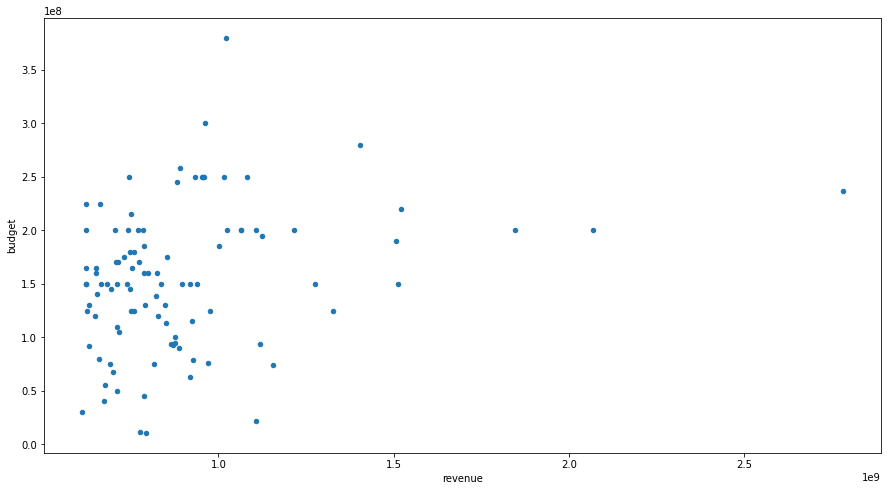

In [33]:
df_chart.sort_values('revenue',ascending=False).head(100).plot(x= 'revenue', y = 'budget', kind = 'scatter', figsize =(15,8));


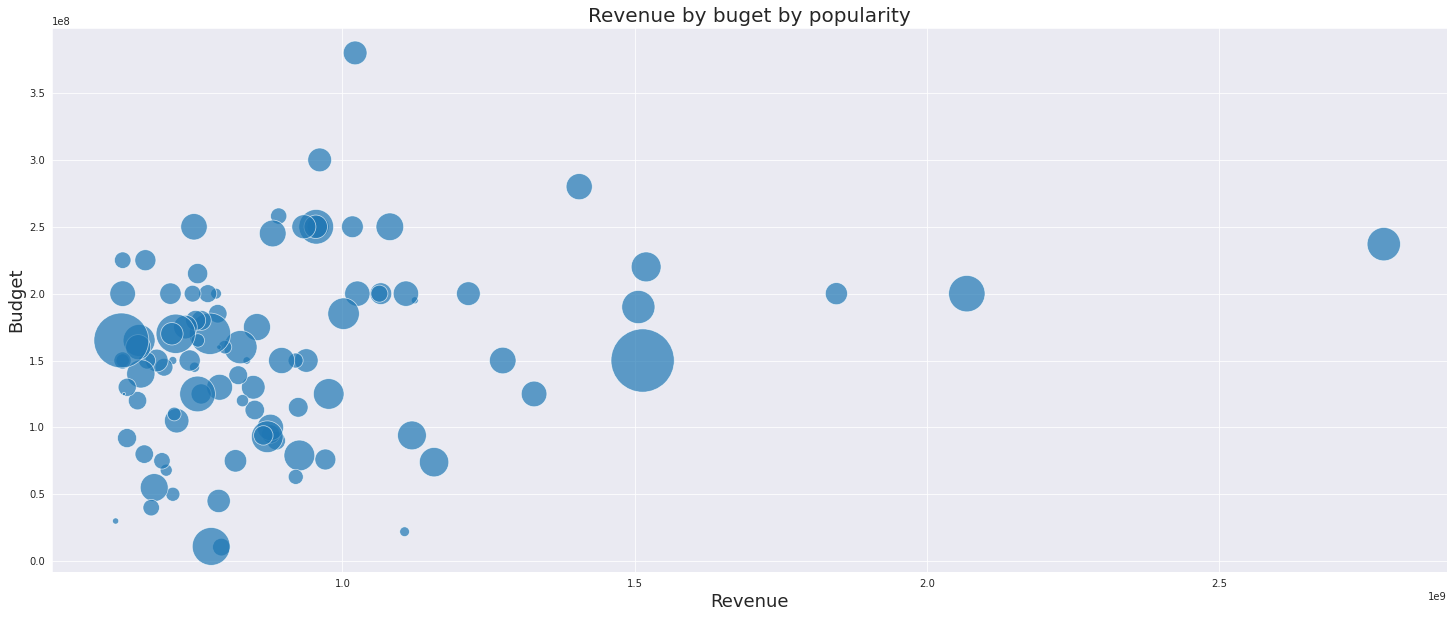

In [34]:
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = [25, 10]
data = df_chart.sort_values('revenue',ascending=False).head(100)
chart = sns.scatterplot(data=data, x='revenue',y='budget', size='popularity',legend=False, sizes=(10, 4000), alpha = 0.7);
plt.title('Revenue by buget by popularity', fontdict={'fontsize':20})
plt.xlabel('Revenue', fontsize=18)
plt.ylabel('Budget', fontsize=18);

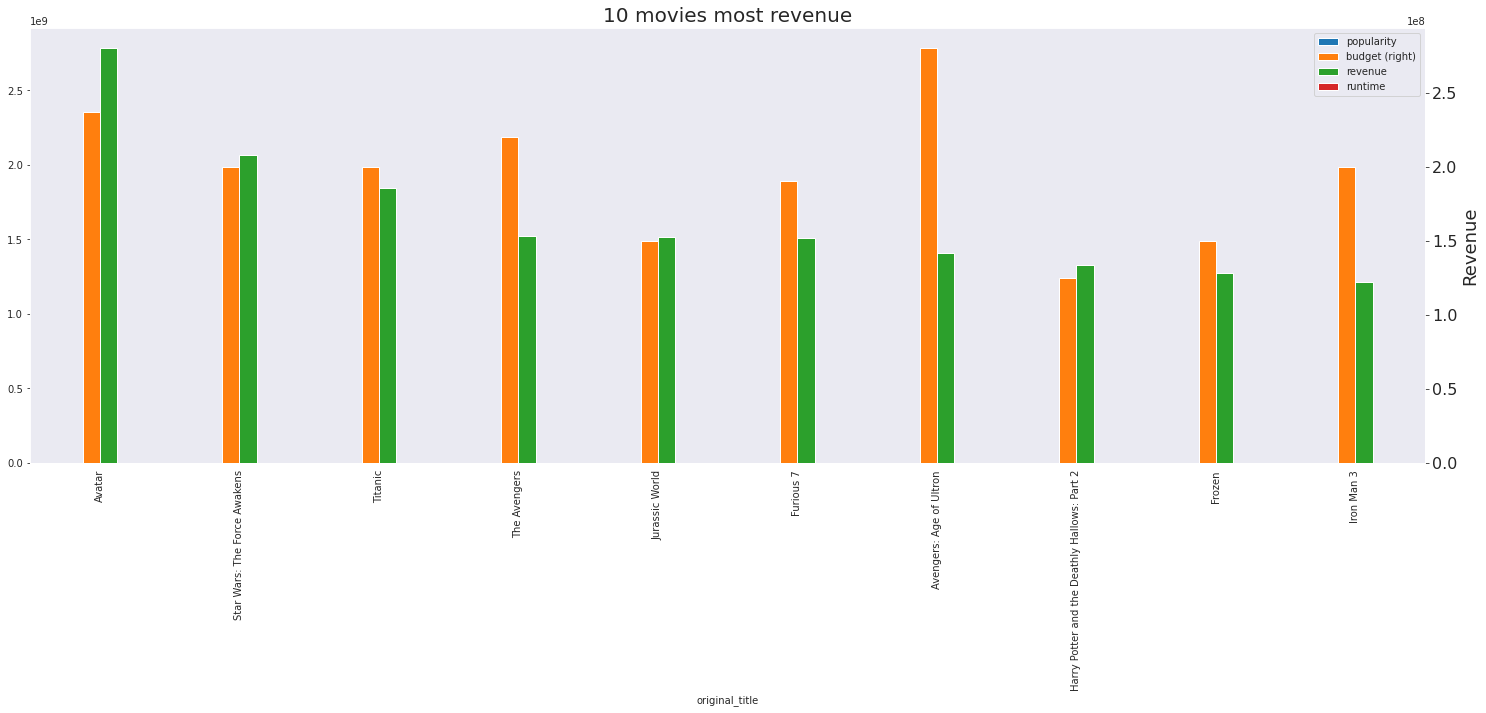

In [35]:
df_chart.sort_values('revenue',ascending=False).head(10).plot(x= 'original_title', kind = 'bar', secondary_y='budget', figsize =(25,8))
plt.title('10 movies most revenue', fontdict={'fontsize':20})
configplot()
plt.xlabel('Original Title', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

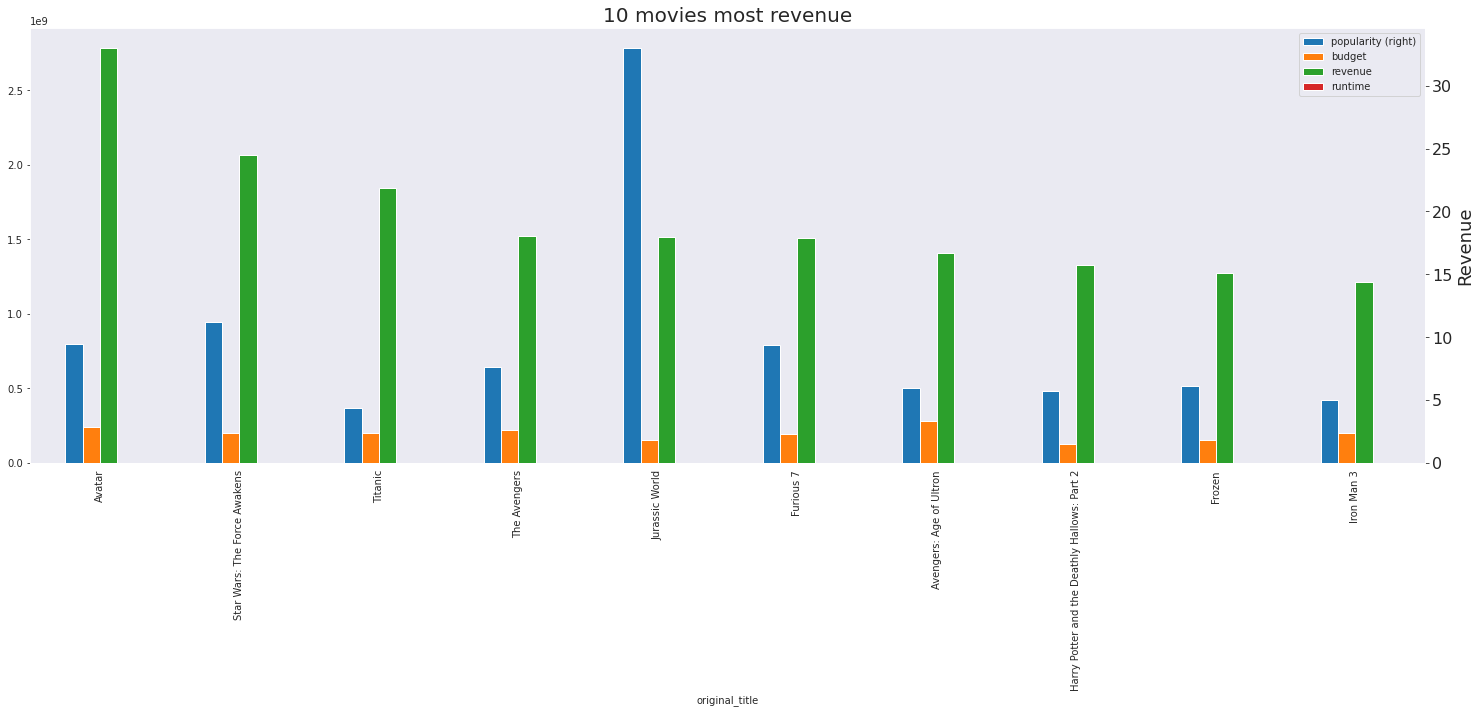

In [36]:
df_chart.sort_values('revenue',ascending=False).head(10).plot(x= 'original_title', kind = 'bar', secondary_y='popularity', figsize =(25,8))
plt.title('10 movies most revenue', fontdict={'fontsize':20})
configplot()
plt.xlabel('Original Title', fontsize=18)
plt.ylabel('Revenue', fontsize=18);

With those charts it is a bit clearly that those properties are not that related to the most reveneu movies.

<a id='conclusions'></a>
## Conclusions

As we saw on the explanatory session, what we can conclued is that the most popular genre of 2015 is Action and of 1960 is Drama. And also that from 2007 and 2012, action were the most popular genre. 

And regarding to the most revenue movie, we can see that budget and popularity are not directly related to the topic, but director and cast can be a strong property related to the movies that have the higher revenue. 


### Limitations

It is importante to remember that the amount of budget and revenue used on the analysis is not the adjusts, and that lead to some differences.  


## Submitting your Project 


In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0